In [1]:
# -*- coding: utf-8 -*-
from pyhive import hive

HOST = "192.168.12.5"
PORT = 10000
NAME = "root"
PASSWORD = "5606603"
DATABASE="behavior_labels"
conn = hive.Connection(host=HOST, port=PORT, username=NAME, password=PASSWORD, auth="LDAP", database=DATABASE)

cursor = conn.cursor()
sql = "SELECT  score, center FROM dw_vip_results where subject = 3"
cursor.execute(sql)
data=[]
for result in cursor.fetchall():
    data.append(result)
    
    
import pandas as pd
data=pd.DataFrame(data)  
data.columns=["score", "center"]
data

,score,center
0,1.08,2
1,1.06,2
2,1.08,2
3,2.67,1
4,1.88,3
5,2.38,6
6,1.16,2
7,1.16,2
8,1.08,2
9,1.08,2


In [5]:
data.describe()

,score,center
count,2.241358e+06,2.241358e+06
mean,1.361207e+00,2.293005e+00
std,4.640557e-01,1.603584e+00
min,1.000000e+00,0.000000e+00
25%,1.060000e+00,2.000000e+00
50%,1.100000e+00,2.000000e+00
75%,1.570000e+00,2.000000e+00
max,3.982000e+01,6.000000e+00


In [2]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(data[["score"]],data["center"])
clf.predict(data[["score"]])

/usr/local/lib/python2.7/site-packages/scipy/sparse/lil.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _csparsetools
/usr/local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:165: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._shortest_path import shortest_path, floyd_warshall, dijkstra,\
/usr/local/lib/python2.7/site-packages/scipy/sparse/csgraph/_validation.py:5: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._tools import csgraph_to_dense, csgraph_from_dense,\
/usr/local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:167: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._traversal import breadth_first_order, depth_first_order, \
/usr/local/lib/python2.7/site-packages/scipy/sparse/csgraph/__init__.py:169: R

array([2, 2, 2, ..., 2, 2, 0])

In [3]:
from sklearn.tree import export_graphviz
import pydotplus

with open("/home/messi/graphviz/Behavior3Tree.dot", "w") as f:
    f = tree.export_graphviz(clf, out_file=f)

dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("/home/messi/graphviz/Behavior3Tree.pdf")

True

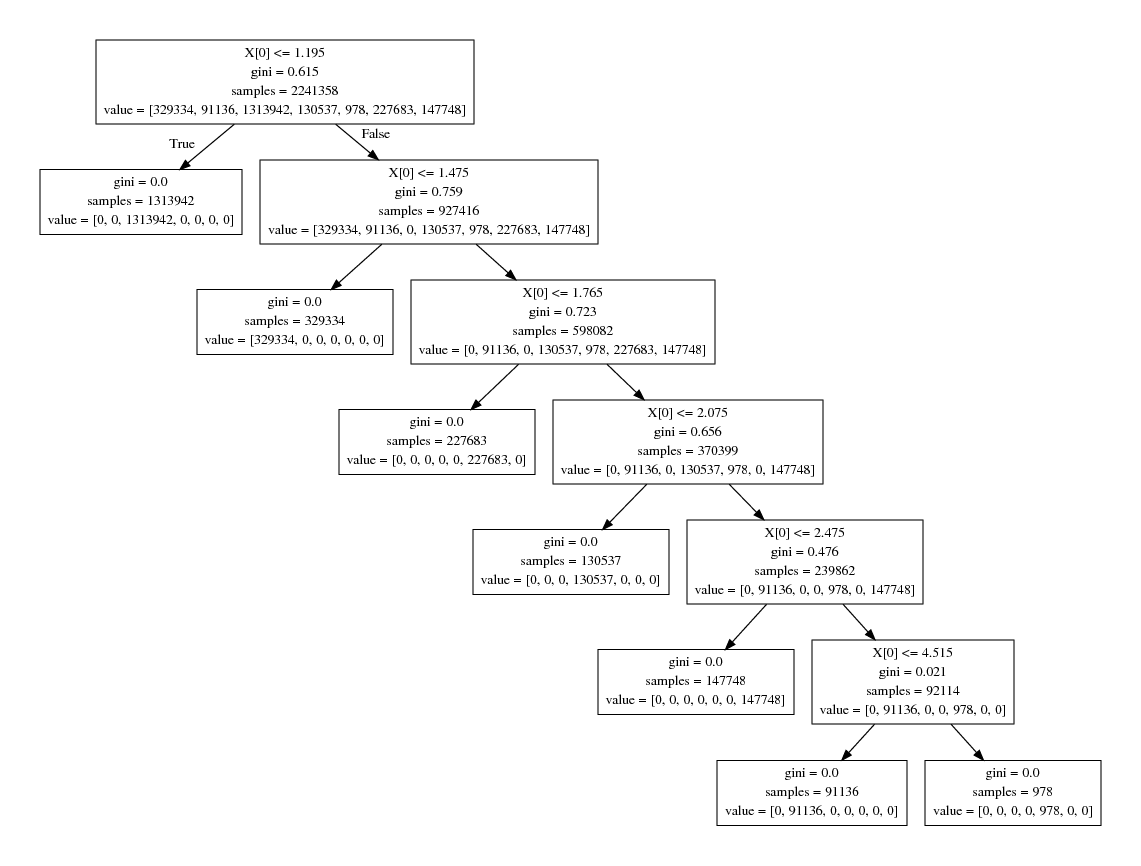

In [4]:
from wand.image import Image as WImage
img = WImage(filename="/home/messi/graphviz/Behavior3Tree.pdf")
img